In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
from babel.numbers import format_currency
from wordcloud import WordCloud, STOPWORDS
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.templates.default = 'plotly_dark'

In [2]:
shark_tank = pd.read_csv("Shark Tank India.csv")
shark_tank.head()

,Season Number,Episode Number,Episode Title,Pitch Number,Startup Name,Industry,Business Description,Company Website,Number of Presenters,Male Presenters,...,Aman Investment Amount,Aman Investment Equity,Aman Debt Amount,Peyush Investment Amount,Peyush Investment Equity,Peyush Debt Amount,Ghazal Investment Amount,Ghazal Investment Equity,Ghazal Debt Amount,Number of sharks in deal
0,1,1,Badlegi Business Ki Tasveer,1,BluePine Foods,Food,Frozen Momos,https://bluepinefoods.com/,3,2.0,...,25.0,5.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
1,1,1,Badlegi Business Ki Tasveer,2,Booz Scooters,Electrical Vehicles,Renting e-bike for mobility in private spaces,https://www.boozup.net/,1,1.0,...,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
2,1,1,Badlegi Business Ki Tasveer,3,Heart up my Sleeves,Beauty/Fashion,Detachable Sleeves,https://heartupmysleeves.com/,1,NaN,...,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
3,1,2,"Insaan, Ideas Aur Sapne",4,Tagz Foods,Food,Healthy Potato Chips Snacks,https://tagzfoods.com/,2,2.0,...,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4,1,2,"Insaan, Ideas Aur Sapne",5,Head and Heart,Education,Brain Development Course,https://thehnh.in/,4,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
shark_tank.shape

(121, 50)

In [4]:
shark_tank.isnull().sum()

Season Number                  0
Episode Number                 0
Episode Title                  0
Pitch Number                   0
Startup Name                   0
Industry                       0
Business Description           0
Company Website                9
Number of Presenters           0
Male Presenters               19
Female Presenters             59
Couple Presenters              1
Pitchers Average Age           0
Started in                    26
Pitchers City                  7
Pitchers State                 5
Yearly Revenue                69
Monthly Sales                 56
Gross Margin                  86
Original Ask Amount            0
Original Ask Equity            0
Valuation Requested            0
Received Offer                 0
Accepted Offer                33
Total Deal Amount             54
Total Deal Equity             54
Total Deal Debt              112
Valuation Offered             54
Ashneer Investment Amount     67
Ashneer Investment Equity     67
Ashneer De

In [5]:
shark_tank.describe()

,Season Number,Episode Number,Pitch Number,Number of Presenters,Male Presenters,Female Presenters,Couple Presenters,Started in,Yearly Revenue,Monthly Sales,...,Aman Investment Amount,Aman Investment Equity,Aman Debt Amount,Peyush Investment Amount,Peyush Investment Equity,Peyush Debt Amount,Ghazal Investment Amount,Ghazal Investment Equity,Ghazal Debt Amount,Number of sharks in deal
count,121.0,121.000000,121.000000,121.000000,102.000000,62.000000,120.000000,95.000000,52.000000,6.500000e+01,...,56.000000,56.000000,1.0,53.000000,53.000000,5.000000,13.000000,13.000000,0.0,67.000000
mean,1.0,19.305785,61.000000,2.082645,1.735294,1.209677,0.208333,2018.052632,405.134615,1.455049e+06,...,15.973036,2.932964,50.0,14.899061,5.996981,23.400000,9.999250,3.592308,NaN,2.223881
std,0.0,10.375326,35.073732,0.927243,0.974186,0.483739,0.407819,2.481285,1055.349288,3.167937e+06,...,22.947765,5.810317,NaN,21.192558,13.631118,2.302173,12.378205,5.322352,NaN,1.165422
min,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,2005.000000,0.000000,0.000000e+00,...,0.000000,0.000000,50.0,0.000000,0.000000,20.000000,0.000000,0.000000,NaN,1.000000
25%,1.0,11.000000,31.000000,1.000000,1.000000,1.000000,0.000000,2017.000000,53.750000,2.000000e+05,...,0.000000,0.000000,50.0,0.000000,0.000000,22.000000,0.000000,0.000000,NaN,1.000000
50%,1.0,19.000000,61.000000,2.000000,1.000000,1.000000,0.000000,2019.000000,112.500000,5.500000e+05,...,3.500008,0.875000,50.0,8.330000,1.000000,25.000000,0.000253,1.000000,NaN,2.000000
75%,1.0,28.000000,91.000000,3.000000,2.000000,1.000000,0.000000,2020.000000,255.500000,1.600000e+06,...,25.000000,4.250000,50.0,25.000000,5.000000,25.000000,20.000000,5.000000,NaN,3.000000
max,1.0,36.000000,121.000000,6.000000,6.000000,3.000000,1.000000,2022.000000,7200.000000,2.000000e+07,...,100.000000,40.000000,50.0,100.000000,75.000000,25.000000,33.330000,17.500000,NaN,5.000000


In [6]:
print(shark_tank['Season Number'].max(),"season \n")
print(shark_tank['Episode Number'].max(),"episodes \n")
print(shark_tank['Pitch Number'].max(),"startups coming for pitching \n")
print(shark_tank['Episode Number'].value_counts().sort_values(ascending=True).unique(),"Pitchers came per episode")

1 season 

36 episodes 

121 startups coming for pitching 

[3 4] Pitchers came per episode


In [33]:
print(shark_tank['Industry'].value_counts())
tmp = shark_tank['Industry'].value_counts().sort_values(ascending=True)
fig = px.bar(tmp,x='Industry',title='<b> Different Industries that came in Shark Tank India </b>',color='Industry',text =tmp)
fig.update_traces(textangle=0)
fig.show()

Food                   37
Beauty/Fashion         22
Manufacturing          17
Technology             11
Education               8
Services                7
Medical                 7
Electrical Vehicles     4
Animal/Pets             3
Hardware                3
Sports                  2
Name: Industry, dtype: int64


In [24]:
total_entreprenuers = shark_tank['Number of Presenters'].sum()
male_entrepreneurs = shark_tank['Male Presenters'].sum()
female_entreprenuers = shark_tank['Female Presenters'].sum()


print(f"Total Number of Pitchers - {int(total_entreprenuers)} \n")
print(f"Total Number of Male Pitchers - {int(male_entrepreneurs)} \n")
print(f"Total Number of  Female Pitchers - {int(female_entreprenuers)} \n")
print(f"Male Entreprenuers Percentage- {round(male_entrepreneurs/total_entreprenuers*100,2)}% \n")
print(f"Female Entreprenuers Percentage- {round(female_entreprenuers/total_entreprenuers*100,2)}% \n")
print(f"Couple Entreprenuers Percentage- {round(shark_tank.loc[shark_tank['Couple Presenters']==1]['Couple Presenters'].sum()/total_entreprenuers*100,2)}% (data incomplete) \n",sep='')

Total Number of Pitchers - 252 

Total Number of Male Pitchers - 177 

Total Number of  Female Pitchers - 75 

Male Entreprenuers Percentage- 70.24% 

Female Entreprenuers Percentage- 29.76% 

Couple Entreprenuers Percentage- 9.92% (data incomplete) 



In [25]:
print(shark_tank.groupby('Startup Name')['Yearly Revenue'].max().nlargest(10))

Startup Name
French Crown          7200.0
Guardian Gears        2500.0
Raising Superstars    1300.0
PlayBoxTV             1020.0
Alpino                1000.0
Hammer Lifestyle      1000.0
Shades of Spring       900.0
Tagz Foods             700.0
Devnagri               500.0
Moonshine              372.0
Name: Yearly Revenue, dtype: float64


In [32]:
top_10_revenue = shark_tank.sort_values('Yearly Revenue',ascending=False)[0:10]
fig = px.bar(top_10_revenue,x='Startup Name',y='Yearly Revenue',title='<b> Top 10 Startups with Highest Revenue (Lakhs INR) </b>',color='Startup Name',text =top_10_revenue['Yearly Revenue'])
fig.update_traces(textangle=0)
fig.show()

In [3]:
shark_tank.head()

,Season Number,Episode Number,Episode Title,Pitch Number,Startup Name,Industry,Business Description,Company Website,Number of Presenters,Male Presenters,...,Aman Investment Amount,Aman Investment Equity,Aman Debt Amount,Peyush Investment Amount,Peyush Investment Equity,Peyush Debt Amount,Ghazal Investment Amount,Ghazal Investment Equity,Ghazal Debt Amount,Number of sharks in deal
0,1,1,Badlegi Business Ki Tasveer,1,BluePine Foods,Food,Frozen Momos,https://bluepinefoods.com/,3,2.0,...,25.0,5.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
1,1,1,Badlegi Business Ki Tasveer,2,Booz Scooters,Electrical Vehicles,Renting e-bike for mobility in private spaces,https://www.boozup.net/,1,1.0,...,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
2,1,1,Badlegi Business Ki Tasveer,3,Heart up my Sleeves,Beauty/Fashion,Detachable Sleeves,https://heartupmysleeves.com/,1,NaN,...,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
3,1,2,"Insaan, Ideas Aur Sapne",4,Tagz Foods,Food,Healthy Potato Chips Snacks,https://tagzfoods.com/,2,2.0,...,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4,1,2,"Insaan, Ideas Aur Sapne",5,Head and Heart,Education,Brain Development Course,https://thehnh.in/,4,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
fig = px.histogram(shark_tank['Number of Presenters'],title='Number of Presenters')
fig.show()

In [7]:
fig = px.scatter(x=shark_tank['Aman Investment Amount'],y=shark_tank['Aman Investment Equity'],title="Aman Investment amount vs Equity")
fig.show()

In [34]:
print(shark_tank.groupby('Startup Name')['Gross Margin'].max().nlargest(10))

Startup Name
Poo-de-Cologne        150.0
Farda                 115.0
Cocofit                95.0
Auli                   80.0
Cos IQ                 75.0
Thea and Sid           75.0
Bummer                 70.0
French Crown           70.0
Moonshine              70.0
Nomad Food Project     70.0
Name: Gross Margin, dtype: float64


In [38]:
top_10_gross_margin = shark_tank.sort_values('Gross Margin',ascending=False)[0:10]
fig = px.bar(top_10_gross_margin,x='Startup Name',y='Gross Margin',title='<b> Top 10 Startups with Highest Gross Margin (%) </b>',color='Startup Name',text =top_10_gross_margin['Gross Margin'])
fig.update_traces(textangle=0)
fig.show()

In [39]:
print(round(shark_tank['Received Offer'].value_counts(normalize=True)*100).astype(str).str.replace('.0','%'),"\n")

1    73%
0    27%
Name: Received Offer, dtype: object 



<AxesSubplot:xlabel='Received Offer', ylabel='count'>

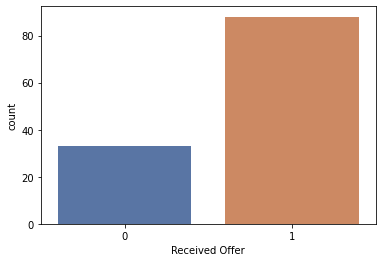

In [40]:
sns.countplot(x='Received Offer',data=shark_tank,palette='deep')

In [47]:
received_offer = round(shark_tank['Received Offer'].value_counts(normalize=True)*100)
fig = px.pie(received_offer,values='Received Offer',names=['Received','Not Received'],title='<b> Percentage of Startups that received offer </b>')
fig.show()

In [48]:
print(round(shark_tank['Accepted Offer'].value_counts(normalize=True)*100).astype(str).str.replace('.0','%'),"\n")

1.0    76%
0.0    24%
Name: Accepted Offer, dtype: object 



In [49]:
accepted_offer = round(shark_tank['Accepted Offer'].value_counts(normalize=True)*100)
fig = px.pie(accepted_offer,values='Accepted Offer',names=['Accepted','Not Accepted'],title='<b> Percentage of Startups that accepted offer </b>')
fig.show()

In [53]:
companies_rejecting_offer=shark_tank.loc[shark_tank['Accepted Offer']==0.0,["Startup Name","Original Ask Amount","Original Ask Equity","Valuation Requested","Valuation Offered"]]
companies_rejecting_offer.head()

,Startup Name,Original Ask Amount,Original Ask Equity,Valuation Requested,Valuation Offered
6,qZense Labs,100.0,0.25,40000,NaN
19,Torch-it,75.0,1.00,7500,NaN
20,La Kheer Deli,50.0,7.50,667,NaN
26,Kabira Handmad,100.0,5.00,2000,NaN
40,Morriko Pure Foods,100.0,3.00,3333,NaN


In [58]:
# print(shark_tank[shark_tank['Ashneer Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
ashneer_investment_industry_wise = shark_tank[shark_tank['Ashneer Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=True)
fig = px.bar(ashneer_investment_industry_wise,x='Industry',title='<b> Different Industries that got investment from Ashneer Grover </b>',color='Industry',text =ashneer_investment_industry_wise)
fig.update_traces(textangle=0)
fig.show()

In [63]:
ashneer_investments = shark_tank.loc[shark_tank['Ashneer Investment Amount']>0,['Startup Name','Ashneer Investment Amount','Ashneer Investment Equity']].sort_values(by='Ashneer Investment Equity')
fig = px.bar(ashneer_investments,x='Ashneer Investment Equity',y='Ashneer Investment Amount',title='<b> Total equity received by ashneer (in %) for investment (in Lakhs) </b>',color='Startup Name',text =ashneer_investments['Ashneer Investment Amount'].map(int).map(str)+" lakhs")
fig.update_layout(dict(xaxis=dict(type="category")))
fig.show()

In [65]:
print(round(shark_tank['Number of sharks in deal'].value_counts(normalize=True)*100).astype(str).str.replace('.0','%'),"\n")

1.0    33%
2.0    31%
3.0    22%
4.0     7%
5.0     6%
Name: Number of sharks in deal, dtype: object 



In [75]:
from operator import index


number_of_sharks_in_deal = shark_tank['Number of sharks in deal'].value_counts().sort_values(ascending=False)
indexed = number_of_sharks_in_deal.index
fig = px.bar(number_of_sharks_in_deal,x=indexed,y='Number of sharks in deal',title='<b> Number of Sharks in Deal </b>',color=number_of_sharks_in_deal.index,text =number_of_sharks_in_deal)
fig.show()

In [76]:
more_than_5_sharks = shark_tank.loc[shark_tank['Number of sharks in deal']>=5,['Startup Name','Number of sharks in deal','Total Deal Amount','Total Deal Equity']]
more_than_5_sharks.head()

,Startup Name,Number of sharks in deal,Total Deal Amount,Total Deal Equity
15,Skippi Ice Pops,5.0,100.0,15.0
49,Find Your Kicks India,5.0,50.0,25.0
63,IN A CAN,5.0,100.0,10.0
79,Sunfox Technologies,5.0,100.0,6.0


In [77]:
print(format_currency(shark_tank['Total Deal Amount'].sum()/100,'INR',locale='en_IN').replace('.00',''),'crores',"\n")

₹39.03 crores 



In [79]:
print(format_currency(shark_tank['Total Deal Equity'].sum()/100,'INR',locale='en_IN').replace('.00',''),'crores',"\n")

₹10.65 crores 



In [80]:
shark_tank.columns

Index(['Season Number', 'Episode Number', 'Episode Title', 'Pitch Number',
       'Startup Name', 'Industry', 'Business Description', 'Company Website',
       'Number of Presenters', 'Male Presenters', 'Female Presenters',
       'Couple Presenters', 'Pitchers Average Age', 'Started in',
       'Pitchers City', 'Pitchers State', 'Yearly Revenue', 'Monthly Sales',
       'Gross Margin', 'Original Ask Amount', 'Original Ask Equity',
       'Valuation Requested', 'Received Offer', 'Accepted Offer',
       'Total Deal Amount', 'Total Deal Equity', 'Total Deal Debt',
       'Valuation Offered', 'Ashneer Investment Amount',
       'Ashneer Investment Equity', 'Ashneer Debt Amount',
       'Namita Investment Amount', 'Namita Investment Equity',
       'Namita Debt Amount', 'Anupam Investment Amount',
       'Anupam Investment Equity', 'Anupam Debt Amount',
       'Vineeta Investment Amount', 'Vineeta Investment Equity',
       'Vineeta Debt Amount', 'Aman Investment Amount',
       'Aman Inv

In [84]:
invested_amount = [shark_tank['Aman Investment Amount'].sum(),shark_tank['Ashneer Investment Amount'].sum(),shark_tank['Anupam Investment Amount'].sum(),
                   shark_tank['Peyush Investment Amount'].sum(),shark_tank['Ghazal Investment Amount'].sum(),shark_tank['Namita Investment Amount'].sum(),shark_tank['Vineeta Investment Amount'].sum()]
names = ['Aman','Ashneer','Anupam','Peyush','Ghazal','Namita','Vineeta']
df = pd.DataFrame({'Names':names,'Invested Amount (in Lakhs INR)':invested_amount})
df.head()

,Names,Invested Amount (in Lakhs INR)
0,Aman,894.490016
1,Ashneer,539.330000
2,Anupam,533.830268
3,Peyush,789.650252
4,Ghazal,129.990252


In [148]:
df['Invested Amount (in Lakhs INR)']=df['Invested Amount (in Lakhs INR)'].astype(int)
df['Invested Amount (in Lakhs INR)']=df['Invested Amount (in Lakhs INR)'].sort_values(ascending=False)
print("Total invested amount",df['Invested Amount (in Lakhs INR)'].sum()/100,"crores \n")

df.head()

Total invested amount 38.99 crores 



,Names,Invested Amount (in Lakhs INR)
0,Aman,894
1,Ashneer,539
2,Anupam,533
3,Peyush,789
4,Ghazal,129


In [149]:
sorted_amount_names = df['Names'].sort_values(ascending=False)  # sorting the names in descending order of invested amount
sorted_amount = df['Invested Amount (in Lakhs INR)'].sort_values(ascending=False)
fig = px.bar(df,x=sorted_amount_names,y=sorted_amount,labels=dict(x="Shark Names",y="Amount"),title='<b> Total Amount Invested by each Shark (in Lakhs INR) </b>',color='Names',text = df['Invested Amount (in Lakhs INR)'].map(str)+" lakhs")
fig.show()

In [150]:
debt = [shark_tank['Aman Debt Amount'].sum(),shark_tank['Anupam Debt Amount'].sum(),shark_tank['Ashneer Debt Amount'].sum(),shark_tank['Peyush Debt Amount'].sum(),shark_tank['Ghazal Debt Amount'].sum(),shark_tank['Namita Debt Amount'].sum(),shark_tank['Vineeta Debt Amount'].sum()]
names_of_sharks = ['Aman','Anupam','Ashneer','Peyush','Ghazal','Namita','Vineeta']
data = pd.DataFrame({'Names':names_of_sharks,'Debt (in Lakhs INR)':debt})  # creating a dataframe with names of sharks and debt amount # creating a dataframe with names of sharks and debt amount
data.head()

,Names,Debt (in Lakhs INR)
0,Aman,50.0
1,Anupam,15.0
2,Ashneer,114.0
3,Peyush,117.0
4,Ghazal,0.0


In [151]:

print(data['Debt (in Lakhs INR)'].sum(),'lakhs INR \n',)
print(data)

351.0 lakhs INR 

     Names  Debt (in Lakhs INR)
0     Aman                 50.0
1   Anupam                 15.0
2  Ashneer                114.0
3   Peyush                117.0
4   Ghazal                  0.0
5   Namita                 25.0
6  Vineeta                 30.0


In [152]:


fig = px.bar(data,x=data['Names'],y=data['Debt (in Lakhs INR)'],labels=dict(x="Shark Names",y="Amount"),title='<b> Total Debt Amount by each Shark (in Lakhs INR) </b>',color='Names',text = data['Debt (in Lakhs INR)'].map(str)+" lakhs")  # creating a bar plot with names of sharks and debt amount
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()